In [2]:
import seaborn as sns
import numpy as np
from numpy import array
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

# create column names
df2 = pd.read_csv("drug_consumption.csv", 
                  names=["Age", "Gender", "Education", "Country", "Ethnicity", "Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstacy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"])

df2.info()
pd.DataFrame.head(df2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        1885 non-null   float64
 1   Gender     1885 non-null   float64
 2   Education  1885 non-null   float64
 3   Country    1885 non-null   float64
 4   Ethnicity  1885 non-null   float64
 5   Nscore     1885 non-null   float64
 6   Escore     1885 non-null   float64
 7   Oscore     1885 non-null   float64
 8   Ascore     1885 non-null   float64
 9   Cscore     1885 non-null   float64
 10  Impulsive  1885 non-null   float64
 11  SS         1885 non-null   float64
 12  Alcohol    1885 non-null   object 
 13  Amphet     1885 non-null   object 
 14  Amyl       1885 non-null   object 
 15  Benzos     1885 non-null   object 
 16  Caff       1885 non-null   object 
 17  Canabis    1885 non-null   object 
 18  Choc       1885 non-null   object 
 19  Coke       1885 non-null   object 
 20  Crack   

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstacy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [9]:
arr = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstacy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]
# remove CL and convert strings to ints
for i in range(0,19):
    df2[arr[i]].replace({"CL0": "0", "CL1": "1", "CL2": "2", "CL3": "3", "CL4": "4", "CL5": "5", "CL6": "6"}, inplace=True)
    df2[arr[i]] = pd.to_numeric(df2[arr[i]])

In [10]:
# one-hot encoding for a column (from discussion 10-8 code)
def one_hot_encoding(colname):
    # convert to an array
    col_arr = array(df2[colname])
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False) # disable sparse return type
    # reshape the array
    col_arr = col_arr.reshape(len(col_arr), 1) 
    onehot_encoded_arr = onehot_encoder.fit_transform(col_arr)
    return(onehot_encoded_arr)

In [5]:
# call the function one_hot_encoding() for each column you want encoded
encoded_xtc = one_hot_encoding("Ecstacy")
print(encoded_xtc)

encoded_alc = one_hot_encoding("Alcohol")
print(encoded_alc)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


<AxesSubplot:>

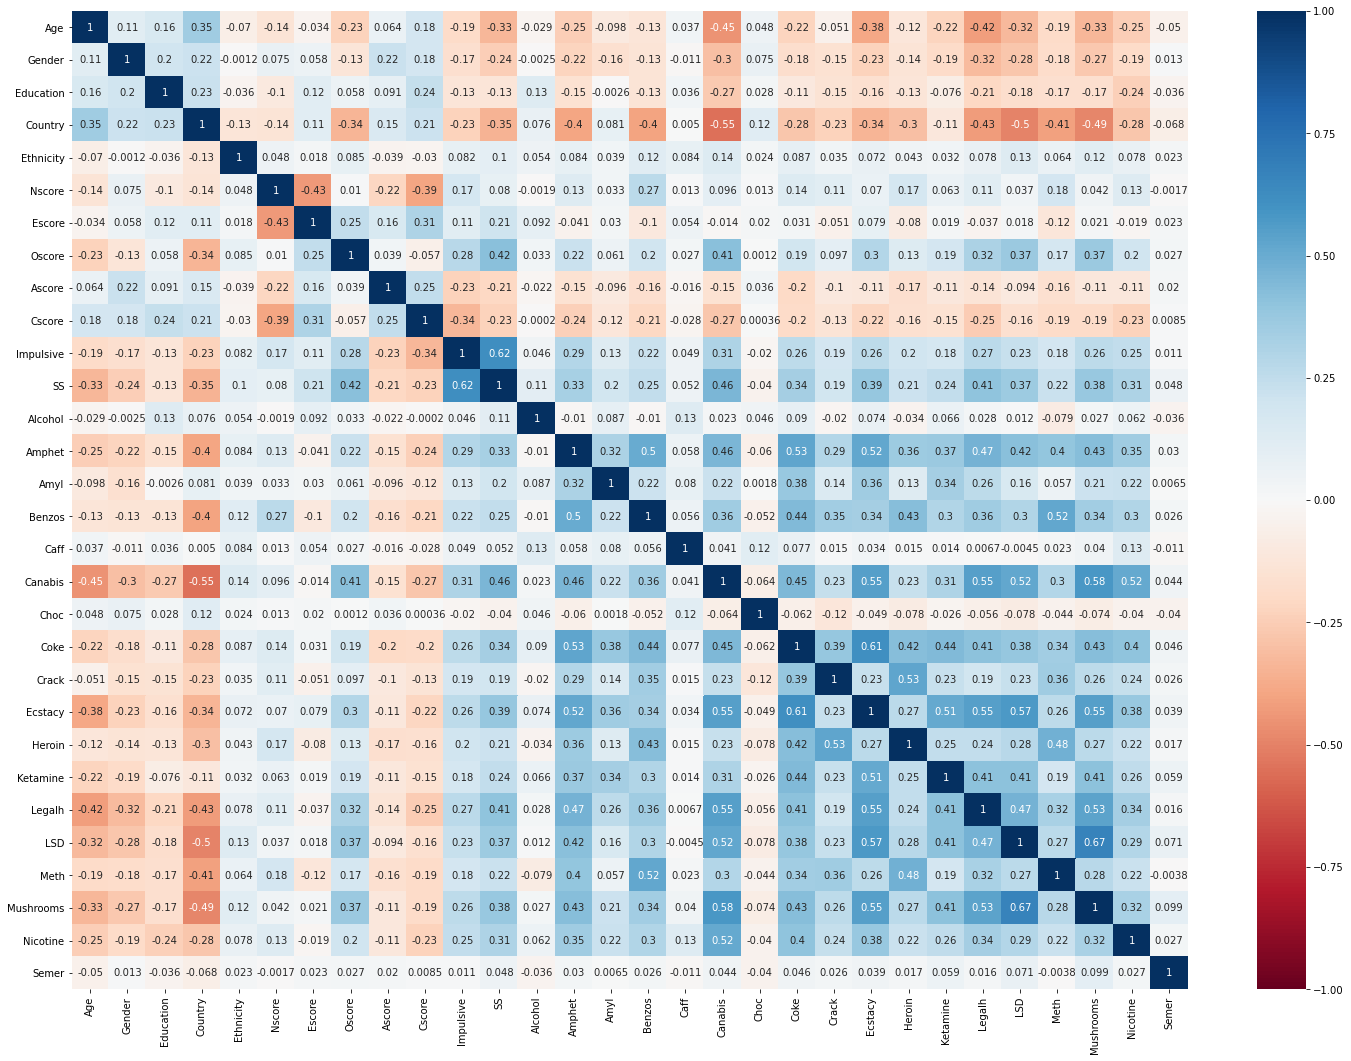

In [5]:
# make size of heatmap bigger
plt.figure(figsize=(25,18))
# generate pearson correlation matrix plot in form of heatmap
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='RdBu')

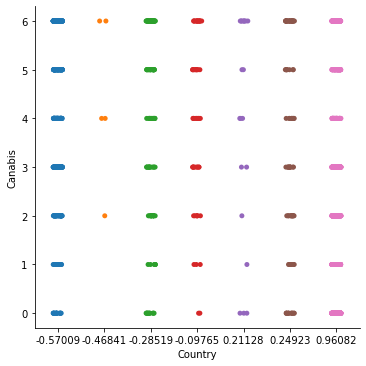

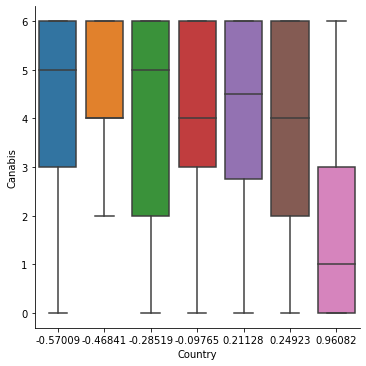

In [6]:
sns.catplot(x="Country", y="Canabis", data=df2)
sns.catplot(x="Country", y="Canabis", kind="box", data=df2)

In [35]:
# For Xlabels argument in functions below. In correct order for graphing
countryLabels = ["USA", "New Zealand", "Other", "Australia", "Ireland", "Canada", "UK"]
ageLabels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
ethnicityLabels = ["Black", "Asian", "White", "Mixed-White/Black", "Other", "Mixed-White/Asian", "Mixed-Black/Asian"]
genderLabels = ["Male", "Female"]
educationLabels = ["Left school before 16 years", "Left school at 16 years", "Left school at 17 years", "Left school at 18 years", "Some college or university", "Professional certificate/ diploma", "University degree", "Masters degree", "Doctorate degree"]

drugLabels = ["Never Used", "Used over a Decade Ago", "Used in Last Decade", "Used in Last Year", "Used in Last Month", "Used in Last Week", "Used in Last Day"]

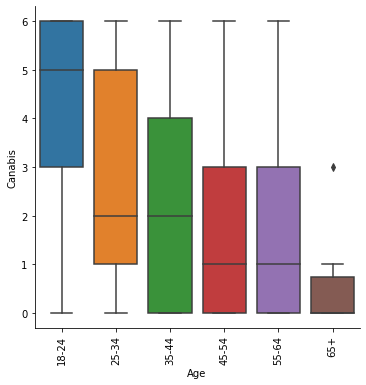

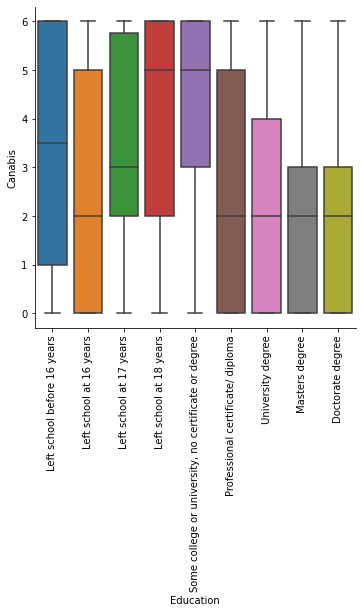

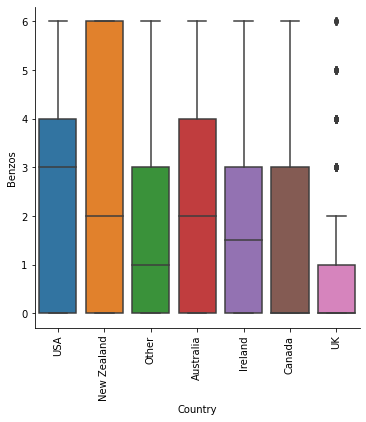

In [8]:
# Create a simple boxplot between a categorical variable and a drug
def create_boxplot(X, Y, Xlabels):
    plot = sns.catplot(x=X,y=Y, kind = "box", data = df2)
    plot.set_xticklabels(Xlabels, rotation = 90)

#Examples
#create_boxplot("Country", "Canabis", countryLabels)
create_boxplot("Age", "Canabis", ageLabels)
#create_boxplot("Ethnicity", "Canabis", ethnicityLabels)
#create_boxplot("Gender", "Canabis", genderLabels)
create_boxplot("Education", "Canabis", educationLabels)

#Interesting plots
create_boxplot("Country", "Benzos", countryLabels)
#create_boxplot("Age", "Coke", ageLabels)
#create_boxplot("Education", "Mushrooms", educationLabels)

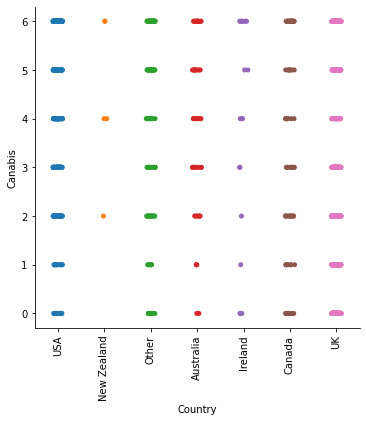

In [9]:
# Create a simple catplot between a categorical variable and a drug
def create_catplot(X, Y, Xlabels):
    plot = sns.catplot(x=X,y=Y,data = df2)
    plot.set_xticklabels(Xlabels, rotation = 90)
    
# Examples
create_catplot("Country", "Canabis", countryLabels)
#create_catplot("Age", "Canabis", ageLabels)
#create_catplot("Ethnicity", "Canabis", ethnicityLabels)
#create_catplot("Gender", "Canabis", genderLabels)
#create_catplot("Education", "Canabis", educationLabels)

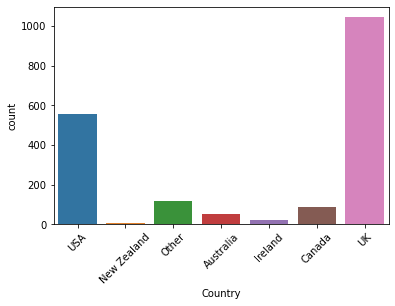

In [10]:
# Create a countplot for a categorical variable
def create_countplot(category, Xlabels, rotation=90):
    plot = sns.countplot(x=category, data=df2)
    plot.set_xticklabels(Xlabels, rotation=rotation)
    
# Examples (rotation is in degrees, leave empty to default to 90 degrees)
create_countplot("Country", countryLabels, 45)
#create_countplot("Age", ageLabels)
#create_countplot("Ethnicity", ethnicityLabels)
#create_countplot("Gender", genderLabels)
#create_countplot("Education", educationLabels)

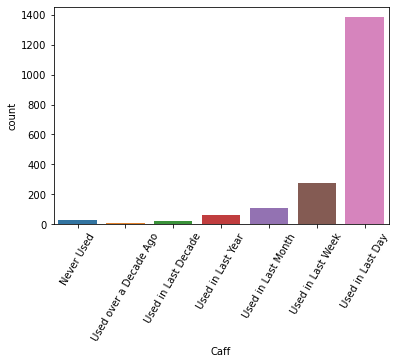

In [11]:
# Create a countplot for a drug's usage responses

# Examples
#create_countplot("Alcohol", drugLabels)
#create_countplot("Coke", drugLabels)
create_countplot("Caff", drugLabels, 60)
#create_countplot("Meth", drugLabels)
#create_countplot("Canabis", drugLabels)

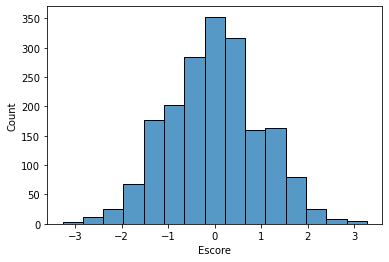

In [12]:
# Create a histplot for personality variables

def create_personalityhistplot(personality):
    plot = sns.histplot(x=personality, data=df2, bins=15)

# Examples
create_personalityhistplot("Escore")
#create_personalityhistplot("Nscore")
#create_personalityhistplot("Oscore")
#create_personalityhistplot("Ascore")
#create_personalityhistplot("Cscore")

In [13]:
# Lists of traits used as potential arguments for the create_histograms function below

traits = ["Age", "Gender", "Education", "Country", "Ethnicity"]
personality_traits = ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive", "SS"]
drug_usage = ["Alcohol", "Amphet", "Amyl", "Benzos", "Caff", "Canabis", "Choc", "Coke", "Crack", "Ecstacy", "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "VSA"]

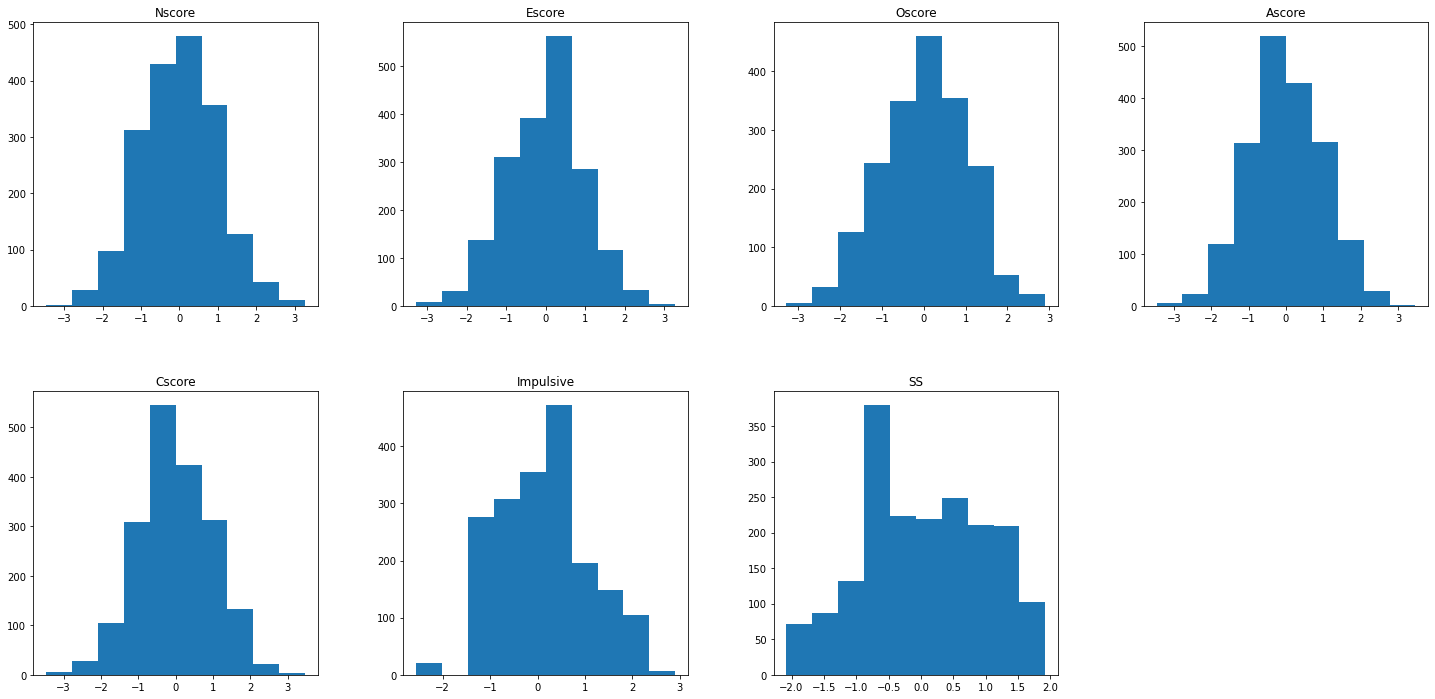

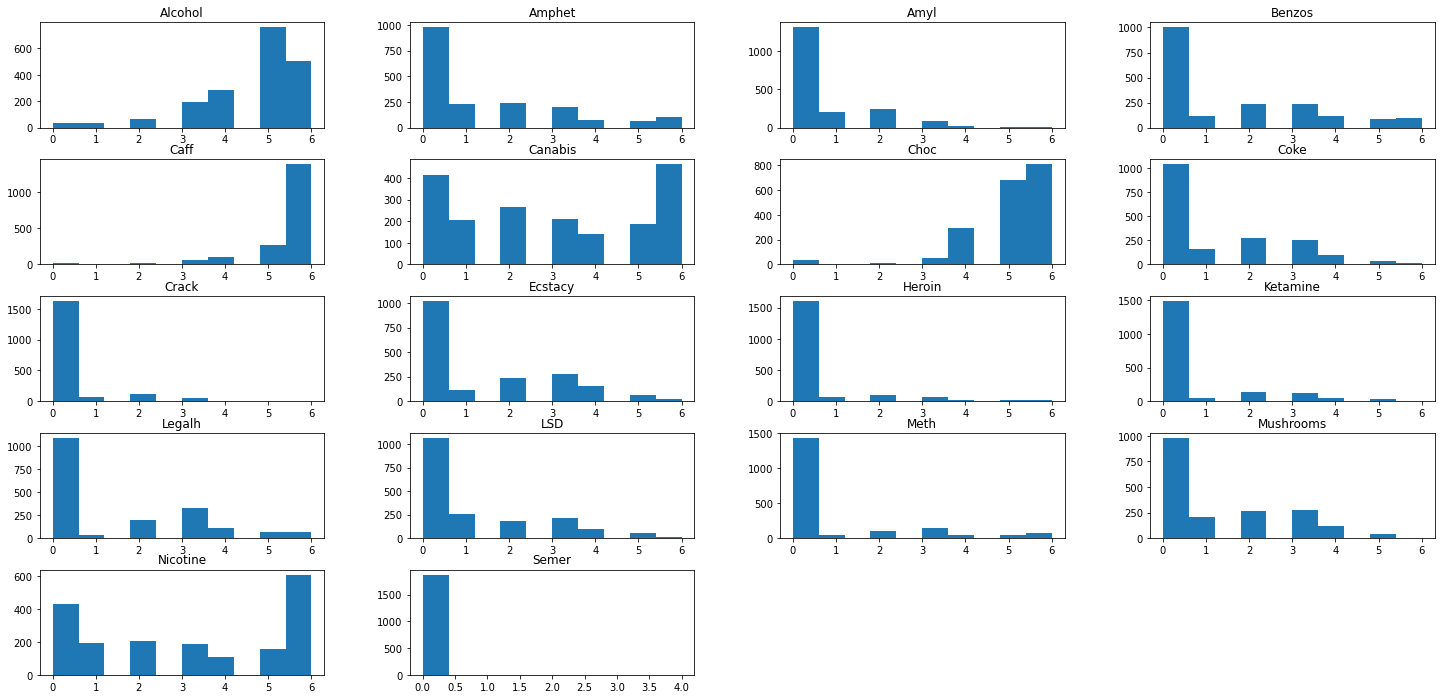

In [14]:
import math

# To create a histogram for a single variable use create_countplot
def create_histograms(personalityTrait):
    # Use math.ceil((len(personalityTrait)/4)) to get appropriate number of rows for output of graphs
    df2[personalityTrait].hist(bins=10, figsize=(25,12), layout=(math.ceil((len(personalityTrait)/4)),4), grid=False)
#create_histograms(traits)
create_histograms(personality_traits)
create_histograms(drug_usage)

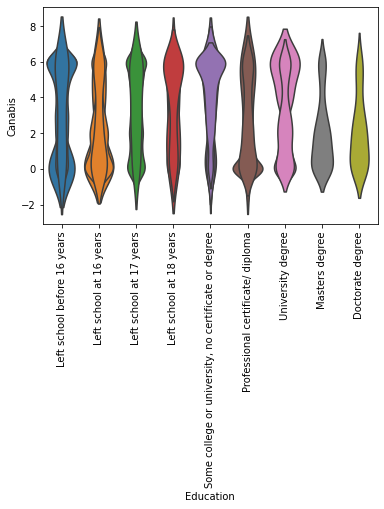

In [15]:
#Create a violinplot to see distribution of drug responses for different categorical variables
def create_violinplot(X,Y,Xlabels):
    ax = sns.violinplot(x=X, y=Y, data=df2, inner=None)
    ax.set_xticklabels(Xlabels, rotation = 90)
    
# Examples
create_violinplot("Country", "Canabis", countryLabels)
create_violinplot("Age", "Canabis", ageLabels)
create_violinplot("Ethnicity", "Canabis", ethnicityLabels)
create_violinplot("Gender","Canabis",  genderLabels)
create_violinplot("Education", "Canabis", educationLabels)

In [16]:
# Use bubble plot instead

#def create_swarmplot(X, Y, Xlabels):
#    plot = sns.swarmplot(x=X, y=Y, data=df2)
#    plot.set_xticklabels(Xlabels, rotation = 90, size=2)
#create_swarmplot("Country", "Canabis", countryLabels)
#create_swarmplot("Age", "Canabis", ageLabels)
#create_swarmplot("Ethnicity", "Canabis", ethnicityLabels)
#create_swarmplot("Gender","Canabis",  genderLabels)
#create_swarmplot("Education", "Canabis", educationLabels)

# Use bubble plot instead

#def combinedViolinSwarmplot(X,Y,Xlabels):
#    ax = sns.violinplot(x=X, y=Y, data=df2, inner=None)
#    ax = sns.swarmplot(x=X, y=Y, data=df2, color=".2", size=2)
#    ax.set_xticklabels(Xlabels, rotation = 90)
#combinedViolinSwarmplot("Country", "Canabis", countryLabels)
#combinedViolinSwarmplot("Age", "Canabis", ageLabels)
#combinedViolinSwarmplot("Ethnicity", "Canabis", ethnicityLabels)
#combinedViolinSwarmplot("Gender","Canabis",  genderLabels)
#combinedViolinSwarmplot("Education", "Canabis", educationLabels)

# Use bubble plot instead

#def combinedBoxSwarmplot(X,Y,Xlabels):
#    ax = sns.boxplot(x=X, y=Y, data=df2, whis=np.inf)
#    ax = sns.swarmplot(x=X, y=Y, data=df2, color=".2", size=2)
#    ax.set_xticklabels(Xlabels, rotation = 90)
#combinedBoxSwarmplot("Country", "Canabis", countryLabels)
#combinedBoxSwarmplot("Age", "Canabis", ageLabels)
#combinedBoxSwarmplot("Ethnicity", "Canabis", ethnicityLabels)
#combinedBoxSwarmplot("Gender","Canabis",  genderLabels)
#combinedBoxSwarmplot("Education", "Canabis", educationLabels)

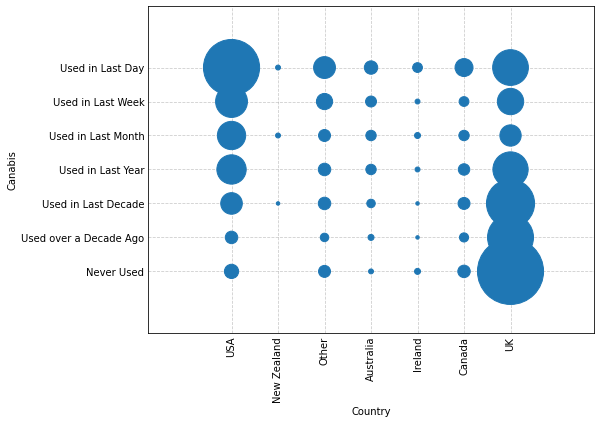

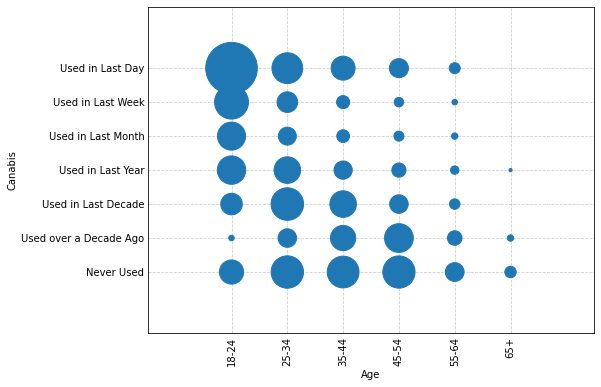

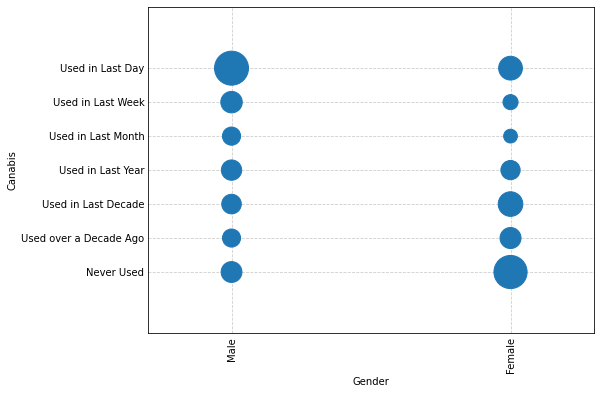

In [17]:
# Plot categorical variable against a drug
def bubbleplot(X,Y,Xlabels):
    df = df2
    x = X 
    y = Y

    # Compute the counts of observations
    df_counts = df.groupby([x, y]).size().reset_index()
    df_counts.columns.values[df_counts.columns == 0] = 'count'
    df_counts[x] = df_counts[x].astype('category')

    # Compute a size variable for the markers so that they have a good size regardless
    # of the total count and the number of unique values in each categorical variable
    scale = 500*df_counts['count'].size
    size = df_counts['count']/df_counts['count'].sum()*scale

    # Create matplotlib scatter plot with additional formatting
    fig, ax = plt.subplots(figsize=(8,6))

    # Convert x axis for better looking graph
    for i in range(0,len(df_counts[x].cat.categories)):
        df_counts[x] = df_counts[x].replace(df_counts[x].cat.categories[i],i)
    ax.scatter(x, y, size, data=df_counts, zorder=2)
    ax.grid(color='grey', linestyle='--', alpha=0.4, zorder=1)
    ax.tick_params(length=0)
    ax.set_yticks(range(0,len(list(set(df_counts[y])))))
    ax.set_xticks(range(0,len(Xlabels)))
    ax.set_xticklabels(Xlabels, rotation=90)
    ax.set_yticklabels(drugLabels)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_frame_on(True)
    ax.margins(.3)

# How to plot by category
# Need to include labels list for X variable if labels are wanted, otherwise passing an empty list
bubbleplot("Country", "Canabis", countryLabels)
bubbleplot("Age", "Canabis", ageLabels)
#bubbleplot("Ethnicity", "Canabis", ethnicityLabels)
bubbleplot("Gender","Canabis",  genderLabels)
#bubbleplot("Education", "Canabis", educationLabels)

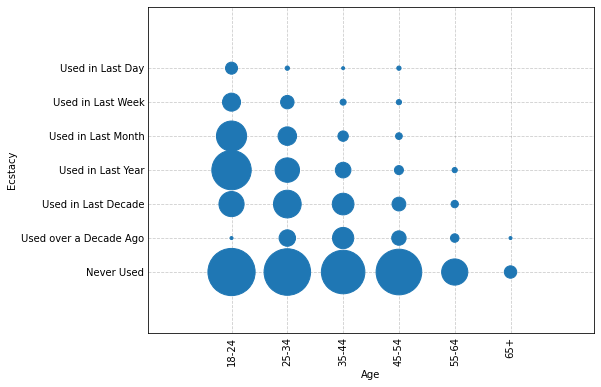

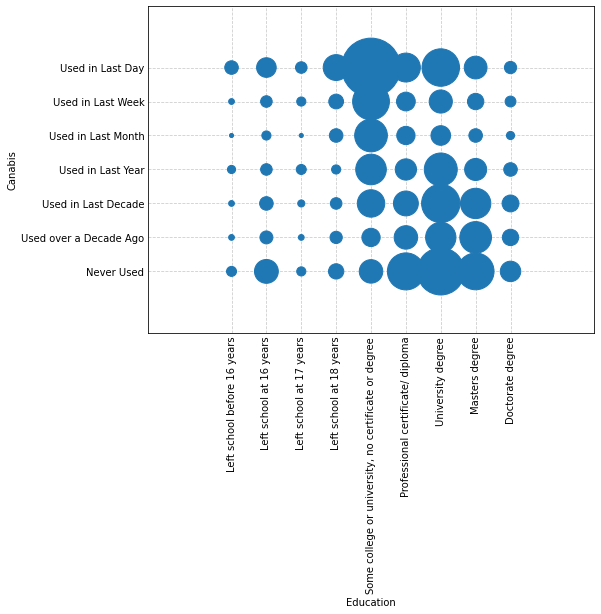

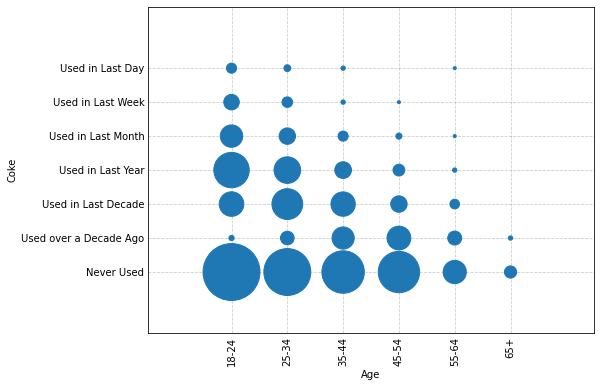

In [18]:
# More interesting bubbleplots
bubbleplot("Age", "Ecstacy", ageLabels)
bubbleplot("Education", "Canabis", educationLabels)
bubbleplot("Age", "Coke", ageLabels)

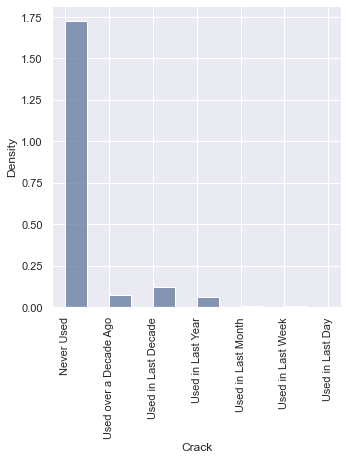

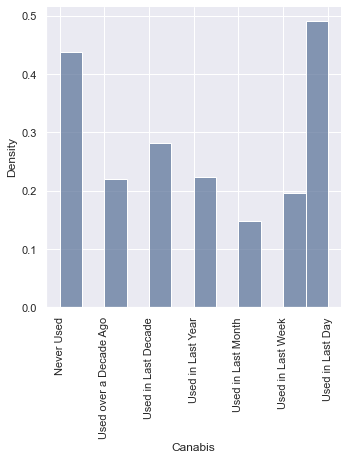

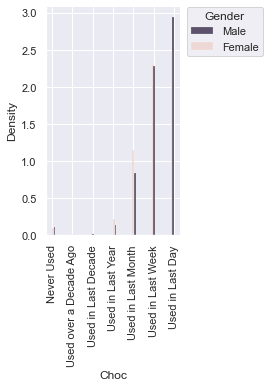

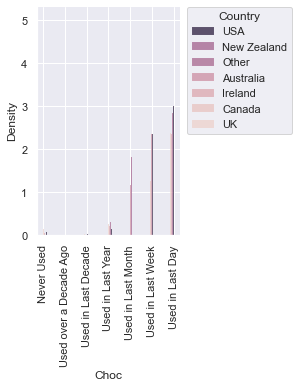

In [70]:
def simpleDensity(X, Xlabel):
    ax = sns.displot(df2, x=X, stat="density", common_norm=False)
    ax.set(xticks=range(0,len(Xlabel)))
    ax.set_xticklabels(Xlabel, rotation=90)
    #ax.set_xticklabels(drugLabels, rotation=90)
    
def density2D(X,Y,Xlabel,Ylabel):
    sns.set_palette("deep", desat=.6)
    sns.set_context(rc={"figure.figsize": (8, 4)})
    #To Do: width of each bar wont increase 
    ax = sns.displot(data=df2, x=X, hue=Y, stat="density", multiple="dodge", height=4, aspect=.7, common_norm=False)
    ax.set(xticks=range(0,len(Xlabel)))
    ax.set_xticklabels(Xlabel, rotation=90)
    
    # Remove old legend
    ax._legend.remove()
    # Create new legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels = Ylabel, title = Y)
        
simpleDensity('Crack', drugLabels)
simpleDensity('Canabis', drugLabels)
density2D('Choc', 'Gender', drugLabels, genderLabels)
density2D('Choc', 'Country', drugLabels, countryLabels)

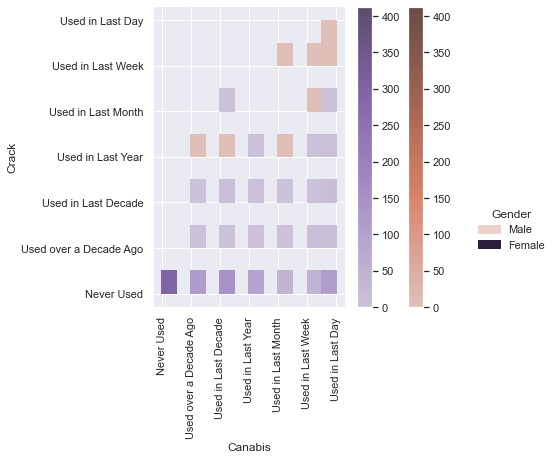

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def bivariate(X, Y, X_label, Y_label, hue_var, hue_varLabels):
    df = df2
    df[X] = df[X].astype(float)
    df[Y] = df[Y].astype(float)
    
    
    # Plot graph
    ax = sns.displot(df, x=X, y=Y, hue=hue_var, cbar=True)
    
    # Label tick marks
    ax.set(xticks=range(0,len(X_label)))
    ax.set(yticks=range(0,len(Y_label)))
    ax.set_xticklabels(X_label, rotation=90)
    ax.set_yticklabels(Y_label)
    
    # Label legend
    for t, l in zip(ax._legend.texts, hue_varLabels):
        t.set_text(l)
        
    # Remove old legend
    #ax._legend.remove()
    # Create new legend
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels = hue_varLabels, title = hue_var)

#to understand distribution, check drugLabels for legend. -.48 is female and .48 is male.
#To Do: fix x and y labels.
bivariate('Canabis','Crack', drugLabels, drugLabels, 'Gender', genderLabels)

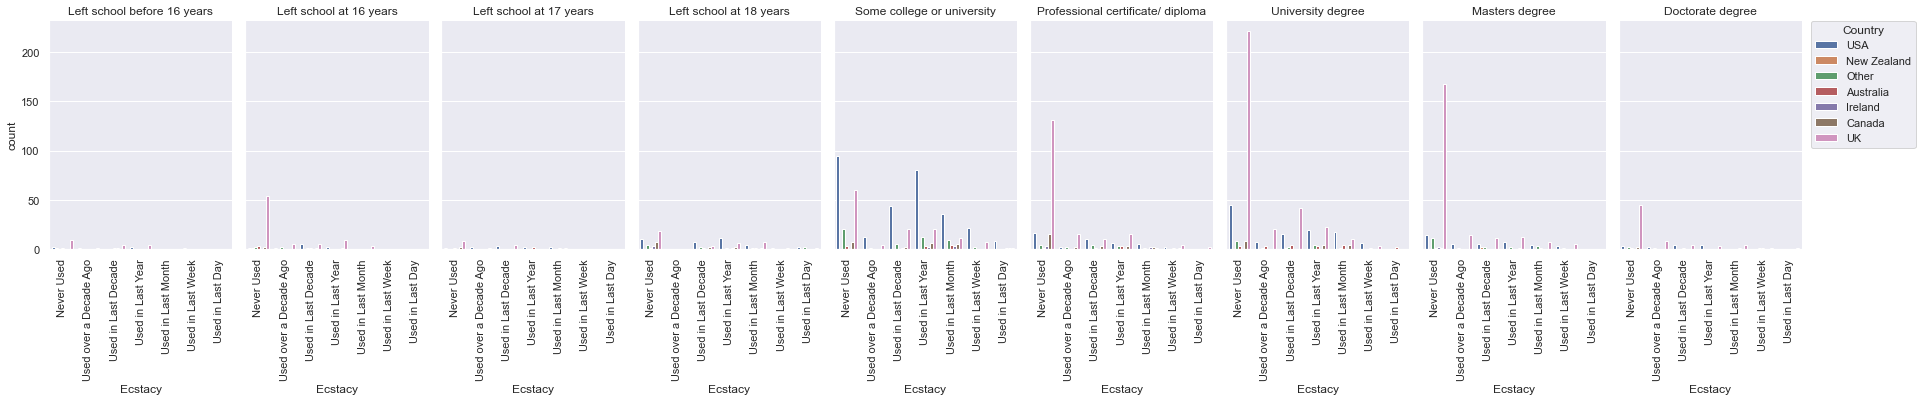

In [68]:
import seaborn as sns
def trivariate(X, degree2, degree2Labels, col, colLabels):
    sns.set_theme(style="darkgrid")
    g = sns.catplot(x= X, hue= degree2, col= col,
                    data=df2, kind="count",
                    height=4, aspect=.7);
    # Remove old legend
    g._legend.remove()
    
    # Set labels for x ticks
    g.set_xticklabels(drugLabels, rotation=90)
    axes = g.axes.flatten()
    for i in range(0,len(colLabels)):
        axes[i].set_title(colLabels[i])
        
    # Create new legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels = degree2Labels, title = degree2)

#to understand distribution, check educationLabels for legend. -.48 is female and .48 is male.
#To Do: fix x and y labels.
#trivariate("Ecstacy", "Gender", genderLabels, "Education", educationLabels)
trivariate("Ecstacy", "Country", countryLabels, "Education", educationLabels)